In [131]:
import os, cv2, random
import numpy as np
import pandas as pd
from PIL import Image  
from PIL import ImageEnhance 
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import requests
import csv
%matplotlib inline 

TRAIN_DIR = 'MOVIE_PSTER_FOR_RESEARCH/'
#train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

def img_show(img):
    io.imshow(img)
    plt.show()

def create_list_path_file_name(TRAIN_DIR):
    list_of_path = []
    list_of_file_name = []
    for i in os.listdir(TRAIN_DIR):
        list_of_path.append(TRAIN_DIR+i)
        list_of_file_name.append(i)
    return list_of_path, list_of_file_name

def get_row_col(file_path):
    img = cv2.imread(file_path)
    (row, col, lay) = img.shape
    return row, col, lay

In [11]:
train_images = create_list_path_file_name(TRAIN_DIR)

In [6]:
list_of_path = []
list_of_file_name = []
for i in os.listdir(TRAIN_DIR):
    list_of_path.append(TRAIN_DIR+i)
    list_of_file_name.append(i)

In [50]:
with open( 'r_c_record.csv', 'w' , encoding='UTF-8', newline='') as csv_file:
    csv_file = csv.writer(csv_file)
    fileHeader = ['file_name','row','column', 'layer', 'ratio']
    csv_file.writerow(fileHeader)
    for path_num in range(0, len(list_of_path)):
        print(path_num)
        r, c , l = get_row_col(list_of_path[path_num])
        csv_file.writerow([ list_of_file_name[path_num], r, c, l ])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [48]:
def read_image(file_path):
    img = cv2.imread(file_path) #cv2.IMREAD_GRAYSCALE cv2.IMREAD_COLOR
    return img

In [66]:
ROWS = 200
COLS = 300

def read_image_ori(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)#, interpolation=cv2.INTER_CUBIC

In [50]:
new = read_image(list_of_path[0])
cv2.imwrite('outfile_ori.jpg', new)

True

In [62]:
new_1 = read_image_ori(list_of_path[0])
cv2.imwrite('outfile_2.jpg', new_1)

True

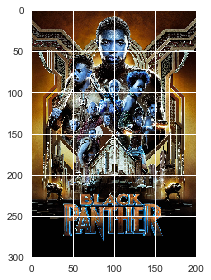

In [120]:
img_300_200 = read_image_ori('MOVIE_PSTER_FOR_RESEARCH/num1.poster.jpeg')
io.imshow(img_300_200)
plt.show()

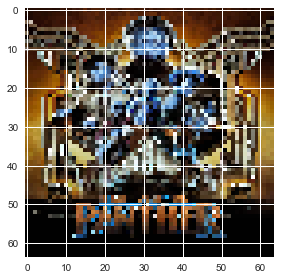

In [56]:
io.imshow(new_1)
plt.show()

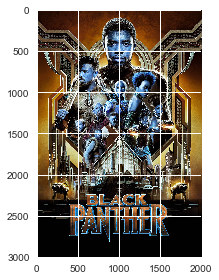

In [58]:
ori = cv2.imread('MOVIE_PSTER_FOR_RESEARCH/num1.poster.jpeg')
io.imshow(ori)
plt.show()

In [116]:
##interpolation way - zoom in : cv2.INTER_CUBIC
##interpolation way - zoom out: cv2.INTER_ARER
##inetrpolation way - default: cv2.INTER_LINEAR
img = cv2.imread('MOVIE_PSTER_FOR_RESEARCH/num1.poster.jpeg')

(300, 200, 3)


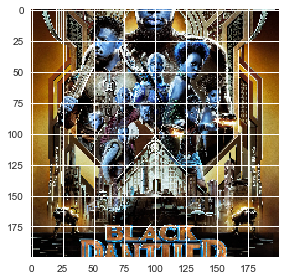

In [121]:
img_new = img_300_200[50:250,:200]
print(img_300_200.shape)
io.imshow(img_new)
plt.show()

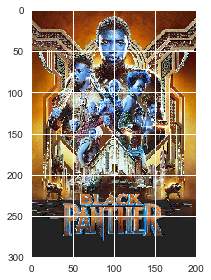

True

In [130]:
# 将img转成HSV
img_hsv = cv2.cvtColor(img_300_200, cv2.COLOR_BGR2HSV)

# 分离通道
img_h = img_hsv[:, :, 0]
img_s = img_hsv[:, :, 1]
img_v = img_hsv[:, :, 2]

# 对V通道进行均衡化
equal_img_v = cv2.equalizeHist(img_v)

# 把均衡化后的V通道重新赋给HSV图像
img_hsv[:, :, 2] = equal_img_v

# 注意OpenCV的imshow只支持显示BGR图像，所以HSV图像显示之前需要重新转成BGR
equal_img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

img_show(equal_img)
cv2.imwrite('eq_img.jpg', equal_img)

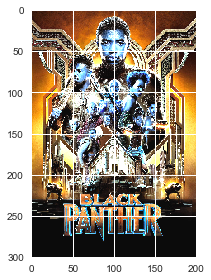

True

In [133]:
bri_img = np.uint8(np.clip((1.5 * img_300_200 + 10), 0, 255))
img_show(bri_img)
cv2.imwrite('bri_img.jpg', bri_img)